In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve, f1_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
RANDOM_STATE = 42

### Function for Confusion Matrix

In [3]:
def plot_confusion_matrix(y_test, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_test, y_pred)

    plt.imshow(cm, cmap="coolwarm")
    plt.title(title)

    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    plt.xticks([0, 1], [0, 1])
    plt.yticks([0, 1], [0, 1])

    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], ha="center", va="center")

    plt.show()

# Load dataset

In [5]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


# Missing Value Analysis:

In [7]:
df.shape
df.isna().sum().sort_values(ascending=False).head(10)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
dtype: int64

In [9]:
print("Duplicate Rows")
print("Duplicates:", df.duplicated().sum())

Duplicate Rows
Duplicates: 0


In [11]:
print("\nINFO:")
df.info()


INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [13]:
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
print("Categorical columns:", len(cat_cols))
car_cols = df.columns
for c in cat_cols:
    print(f"{c} -> {df[c].nunique()} unique | sample: {df[c].unique()[:6]}")

Categorical columns: 2
ca -> 5 unique | sample: ['0' '3' '2' '1' '?']
thal -> 4 unique | sample: ['6' '3' '7' '?']


In [15]:
for col in cat_cols:
    df[col] = df[col].replace("?" , np.nan)

In [17]:
df.isna().sum().sort_values(ascending=False).head(10)

ca          4
thal        2
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
dtype: int64

In [19]:
for col in cat_cols:
    df[col] = df[col].astype("float")
    df[col] = df[col].fillna(df[col].median())

## ? Handled Successfully 

In [21]:
df.isna().sum().sort_values(ascending=False).head(10)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
dtype: int64

# Statistical Summary

In [23]:
df.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


# Visuaization

## Correlation HeatMap

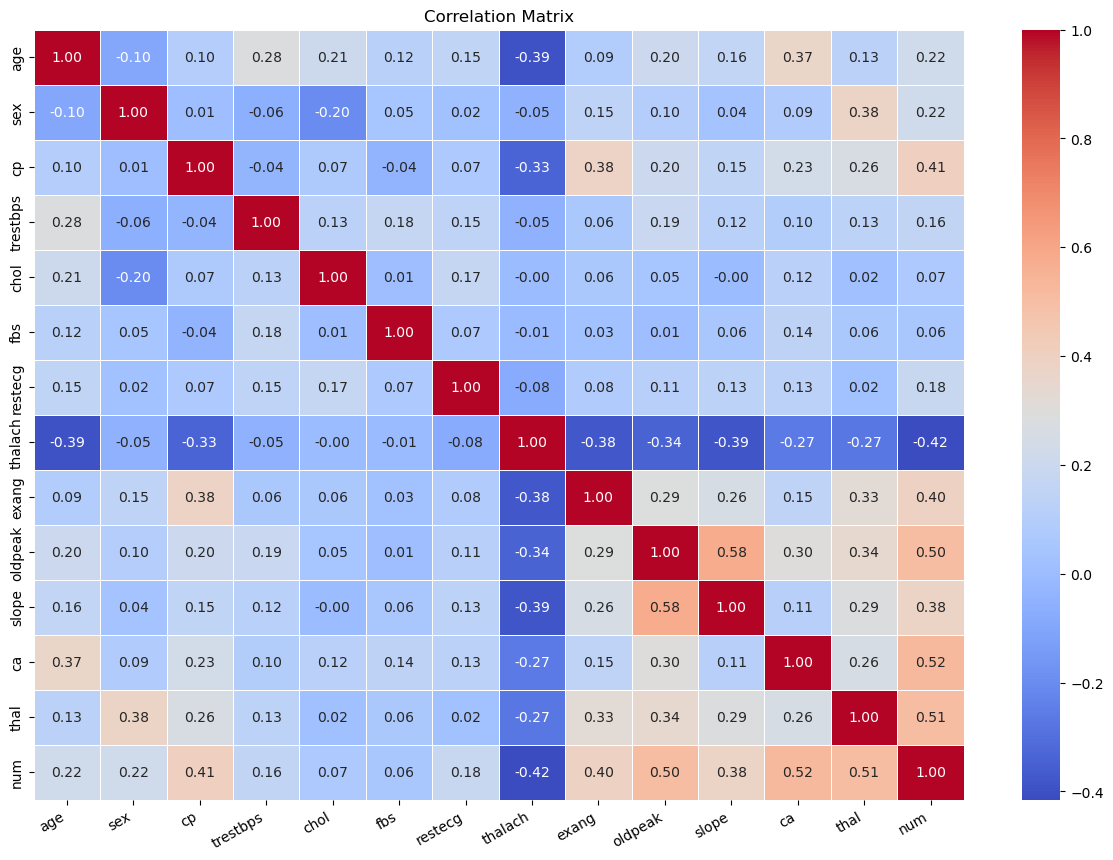

In [25]:
correlation_matrix= df.corr()

plt.figure(figsize=(15,10)) 

sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidth=0.5) 
plt.title('Correlation Matrix')
plt.xticks(rotation=30,ha='right') 
plt.show()

# Target distribution 

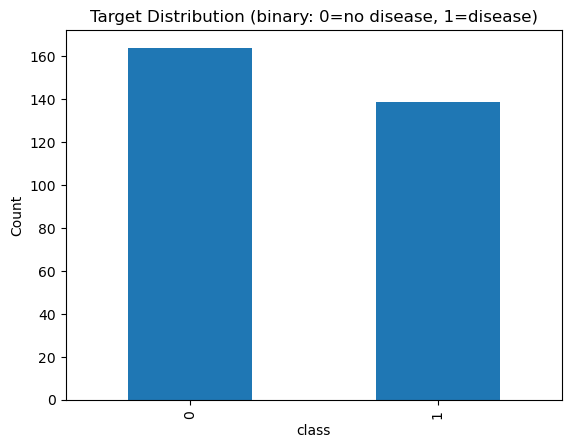

In [27]:
y_bin = (df["num"].astype(int) > 0).astype(int)

plt.figure()
y_bin.value_counts().sort_index().plot(kind="bar")
plt.title("Target Distribution (binary: 0=no disease, 1=disease)")
plt.xlabel("class")
plt.ylabel("Count")
plt.show()

# Histogram of Age and cholesterol level

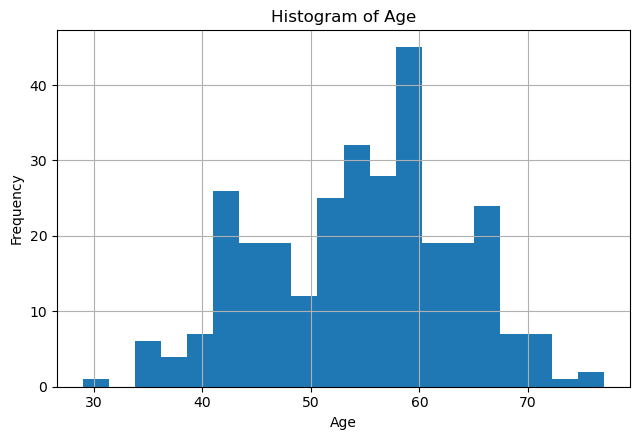

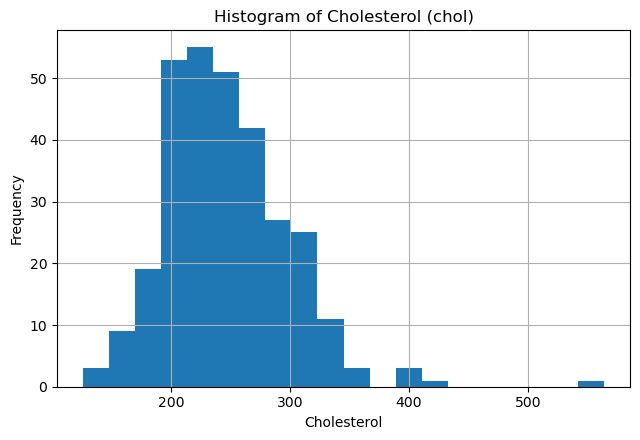

In [29]:
plt.figure(figsize=(6.5, 4.5))
pd.to_numeric(df["age"], errors="coerce").dropna().hist(bins=20)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6.5, 4.5))
pd.to_numeric(df["chol"], errors="coerce").dropna().hist(bins=20)
plt.title("Histogram of Cholesterol (chol)")
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## Define target label and features

In [31]:
X = df.drop(columns=["num"])
y = (df["num"] > 0).astype(int)

In [33]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

# Train/test split

In [35]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=RANDOM_STATE)

Accuracy : 0.8688524590163934
Precision: 0.8708619777895293
Recall   : 0.8688524590163934
F1 Score : 0.8689229684470298


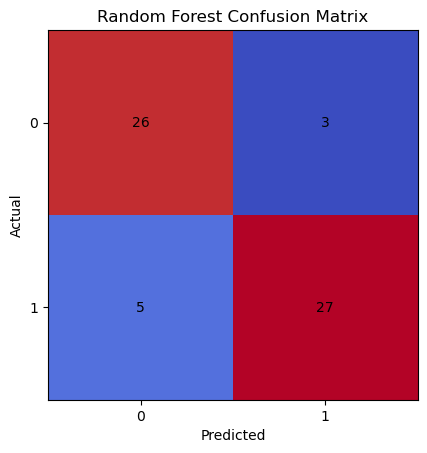

In [37]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
pre_rf = precision_score(y_test, y_pred_rf, average="weighted", zero_division=0)
re_rf  = recall_score(y_test, y_pred_rf, average="weighted", zero_division=0)
f1_rf  = f1_score(y_test, y_pred_rf, average="weighted", zero_division=0)


print("Accuracy :", acc_rf)
print("Precision:", pre_rf)
print("Recall   :", re_rf)
print("F1 Score :", f1_rf)

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

Decision Tree Results
Accuracy : 0.7540983606557377
Precision: 0.7547682002467829
Recall   : 0.7540983606557377
F1 Score : 0.7542306725413143


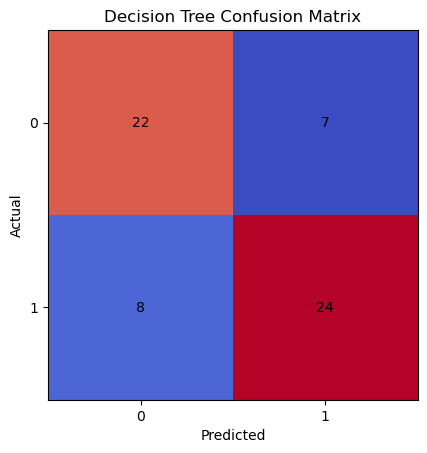

In [39]:
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
pre_dt = precision_score(y_test, y_pred_dt, average="weighted", zero_division=0)
re_dt  = recall_score(y_test, y_pred_dt, average="weighted", zero_division=0)
f1_dt  = f1_score(y_test, y_pred_dt, average="weighted", zero_division=0)

print("Decision Tree Results")
print("Accuracy :", acc_dt)
print("Precision:", pre_dt)
print("Recall   :", re_dt)
print("F1 Score :", f1_dt)
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")


Accuracy : 0.8852459016393442
Precision: 0.8854765453126109
Recall   : 0.8852459016393442
F1 Score : 0.8851220105749872


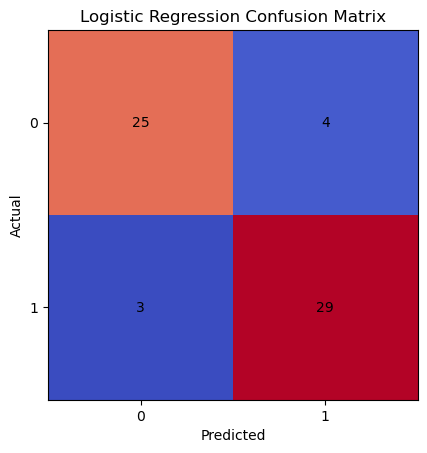

In [41]:
lr = LogisticRegression(random_state=42)

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
pre_lr = precision_score(y_test, y_pred_lr, average="weighted", zero_division=0)
re_lr = recall_score(y_test, y_pred_lr, average="weighted", zero_division=0)
f1_lr = f1_score(y_test, y_pred_lr, average="weighted", zero_division=0)

print("Accuracy :", acc_lr)
print("Precision:", pre_lr)
print("Recall   :", re_lr)
print("F1 Score :", f1_lr)
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression Confusion Matrix")


Accuracy : 0.9180327868852459
Precision: 0.9186144896879957
Recall   : 0.9180327868852459
F1 Score : 0.9180768908471046


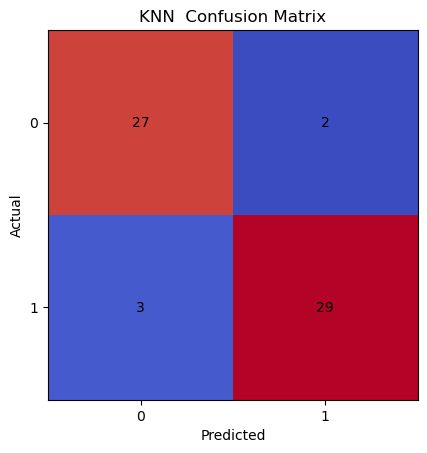

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average="weighted", zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_knn, average="weighted", zero_division=0))
print("F1 Score :", f1_score(y_test, y_pred_knn, average="weighted", zero_division=0))
plot_confusion_matrix(y_test, y_pred_knn, "KNN  Confusion Matrix")

Accuracy : 0.9016393442622951
Precision: 0.9036841177507492
Recall   : 0.9016393442622951
F1 Score : 0.9016922263352722


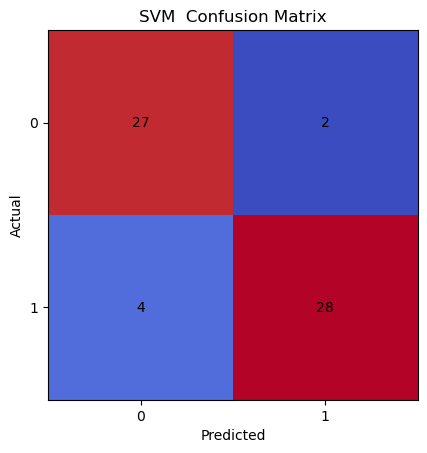

In [47]:
svm = SVC(kernel="rbf", random_state=42)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, average="weighted", zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_svm, average="weighted", zero_division=0))
print("F1 Score :", f1_score(y_test, y_pred_svm, average="weighted", zero_division=0))
plot_confusion_matrix(y_test, y_pred_svm, "SVM  Confusion Matrix")


Artificial Neural Network (ANN) Results for relu Before PCA
Accuracy : 0.7868852459016393
Precision: 0.7907009609949123
Recall   : 0.7868852459016393
F1 Score : 0.7868852459016393


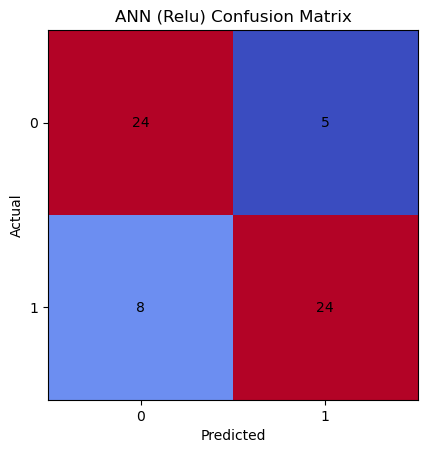

In [49]:
ann = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',            
    solver='adam',                
    max_iter=2000,                
    early_stopping=True,          
    random_state=42,
    learning_rate_init=0.001
)

ann.fit(X_train, y_train)
y_pred_ann = ann.predict(X_test)
print("Artificial Neural Network (ANN) Results for relu Before PCA")
print("Accuracy :", accuracy_score(y_test, y_pred_ann))
print("Precision:", precision_score(y_test, y_pred_ann, average='weighted', zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_ann, average='weighted', zero_division=0))
print("F1 Score :", f1_score(y_test, y_pred_ann, average='weighted', zero_division=0))
plot_confusion_matrix(y_test, y_pred_ann, "ANN (Relu) Confusion Matrix")


Artificial Neural Network (ANN) Results for tanh function before PCA
Accuracy : 0.8360655737704918
Precision: 0.8380398378283096
Recall   : 0.8360655737704918
F1 Score : 0.8361537105587873


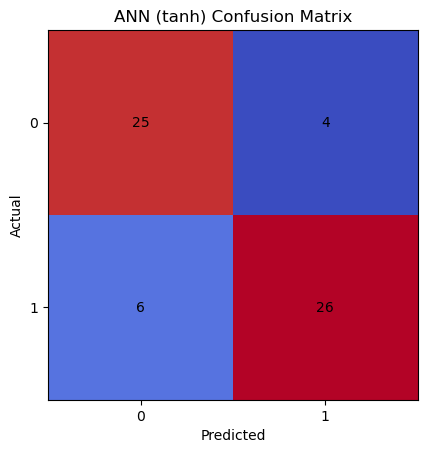

In [51]:
ann = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='tanh',            
    solver='adam',                
    max_iter=2000,                
    early_stopping=True,          
    random_state=42,
    learning_rate_init=0.001
)

ann.fit(X_train, y_train)
y_pred_ann = ann.predict(X_test)
print("Artificial Neural Network (ANN) Results for tanh function before PCA")
print("Accuracy :", accuracy_score(y_test, y_pred_ann))
print("Precision:", precision_score(y_test, y_pred_ann, average='weighted', zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_ann, average='weighted', zero_division=0))
print("F1 Score :", f1_score(y_test, y_pred_ann, average='weighted', zero_division=0))
plot_confusion_matrix(y_test, y_pred_ann, "ANN (tanh) Confusion Matrix")


In [53]:
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_train)

print("Original number of features:", X.shape[1])
print("Number of PCA features:", X_pca.shape[1])

X_test_pca  = pca.transform(X_test)

Original number of features: 13
Number of PCA features: 12


Accuracy : 0.8360655737704918
Precision: 0.8429494003264495
Recall   : 0.8360655737704918
F1 Score : 0.835889300193901


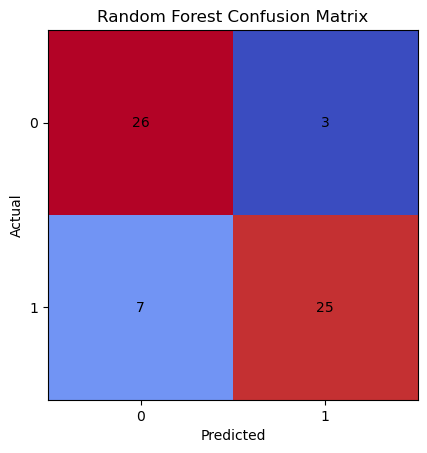

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf = RandomForestClassifier(random_state=42)

rf.fit(X_pca, y_train)

y_pred_rf = rf.predict(X_test_pca)

acc_rf = accuracy_score(y_test, y_pred_rf)
pre_rf = precision_score(y_test, y_pred_rf, average="weighted", zero_division=0)
re_rf  = recall_score(y_test, y_pred_rf, average="weighted", zero_division=0)
f1_rf  = f1_score(y_test, y_pred_rf, average="weighted", zero_division=0)

print("Accuracy :", acc_rf)
print("Precision:", pre_rf)
print("Recall   :", re_rf)
print("F1 Score :", f1_rf)

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

Decision Tree Results
Accuracy : 0.7377049180327869
Precision: 0.7377049180327869
Recall   : 0.7377049180327869
F1 Score : 0.7377049180327869


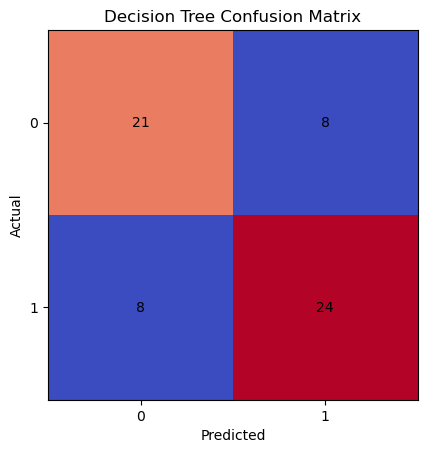

In [57]:
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_pca, y_train)

y_pred_dt = dt.predict(X_test_pca)

acc_dt = accuracy_score(y_test, y_pred_dt)
pre_dt = precision_score(y_test, y_pred_dt, average="weighted", zero_division=0)
re_dt  = recall_score(y_test, y_pred_dt, average="weighted", zero_division=0)
f1_dt  = f1_score(y_test, y_pred_dt, average="weighted", zero_division=0)

print("Decision Tree Results")
print("Accuracy :", acc_dt)
print("Precision:", pre_dt)
print("Recall   :", re_dt)
print("F1 Score :", f1_dt)
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")

Accuracy : 0.8524590163934426
Precision: 0.8526009509616066
Recall   : 0.8524590163934426
F1 Score : 0.8522997278821265


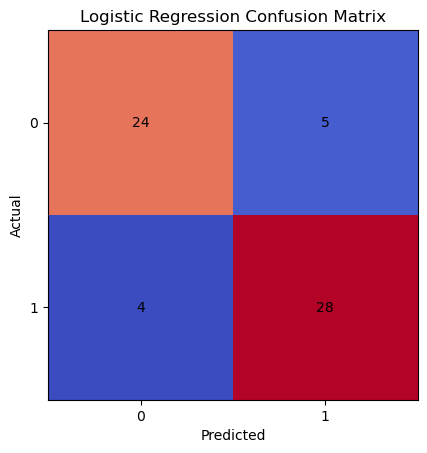

In [59]:
lr = LogisticRegression(random_state=42)

lr.fit(X_pca, y_train)

y_pred_lr = lr.predict(X_test_pca)

acc_lr = accuracy_score(y_test, y_pred_lr)
pre_lr = precision_score(y_test, y_pred_lr, average="weighted", zero_division=0)
re_lr = recall_score(y_test, y_pred_lr, average="weighted", zero_division=0)
f1_lr = f1_score(y_test, y_pred_lr, average="weighted", zero_division=0)

print("Accuracy :", acc_lr)
print("Precision:", pre_lr)
print("Recall   :", re_lr)
print("F1 Score :", f1_lr)
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression Confusion Matrix")

In [63]:
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_train)
X_test_pca  = pca.transform(X_test)

print("Original number of features:", X_train.shape[1])
print("Number of PCA features  :", X_pca.shape[1])

Original number of features: 13
Number of PCA features  : 12


Accuracy : 0.9180327868852459
Precision: 0.9186144896879957
Recall   : 0.9180327868852459
F1 Score : 0.9180768908471046


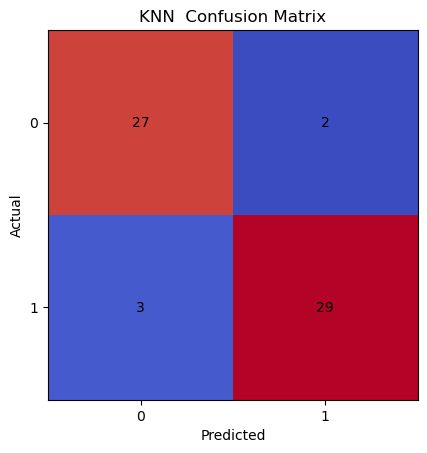

In [65]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca, y_train)

y_pred_knn = knn.predict(X_test_pca)

print("Accuracy :", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average="weighted", zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_knn, average="weighted", zero_division=0))
print("F1 Score :", f1_score(y_test, y_pred_knn, average="weighted", zero_division=0))
plot_confusion_matrix(y_test, y_pred_knn, "KNN  Confusion Matrix")

Accuracy : 0.9016393442622951
Precision: 0.9036841177507492
Recall   : 0.9016393442622951
F1 Score : 0.9016922263352722


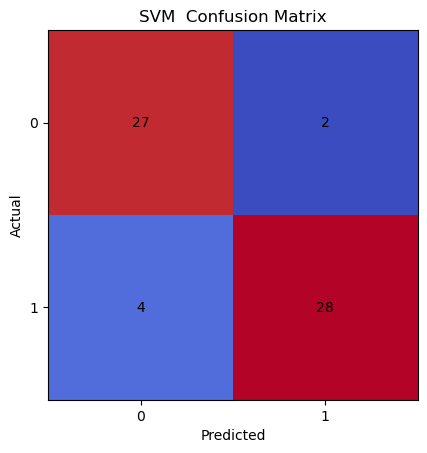

In [67]:
svm = SVC(kernel="rbf", random_state=42)
svm.fit(X_pca, y_train)

# 3) Predict + metrics
y_pred_svm = svm.predict(X_test_pca)

print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, average="weighted", zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_svm, average="weighted", zero_division=0))
print("F1 Score :", f1_score(y_test, y_pred_svm, average="weighted", zero_division=0))
plot_confusion_matrix(y_test, y_pred_svm, "SVM  Confusion Matrix")

Artificial Neural Network (ANN) Results - Before PCA (Improved)
Accuracy : 0.7868852459016393
Precision: 0.7907009609949123
Recall   : 0.7868852459016393
F1 Score : 0.7868852459016393


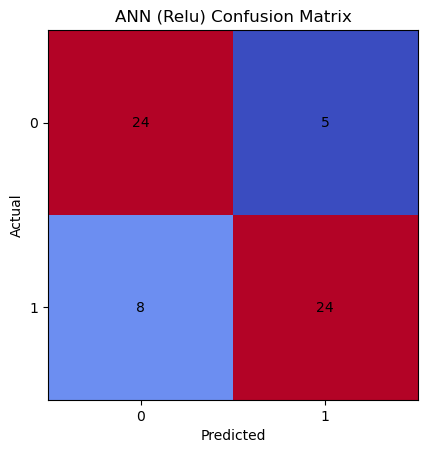

In [69]:
ann = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',            
    solver='adam',                
    max_iter=2000,                
    early_stopping=True,          
    random_state=42,
    learning_rate_init=0.001
)

ann.fit(X_pca, y_train)
y_pred_ann = ann.predict(X_test_pca)
print("Artificial Neural Network (ANN) Results - Before PCA (Improved)")
print("Accuracy :", accuracy_score(y_test, y_pred_ann))
print("Precision:", precision_score(y_test, y_pred_ann, average='weighted', zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_ann, average='weighted', zero_division=0))
print("F1 Score :", f1_score(y_test, y_pred_ann, average='weighted', zero_division=0))
plot_confusion_matrix(y_test, y_pred_ann, "ANN (Relu) Confusion Matrix")


Artificial Neural Network (ANN) Results for tanh function
Accuracy : 0.8524590163934426
Precision: 0.8530759739115107
Recall   : 0.8524590163934426
F1 Score : 0.8525384035247887


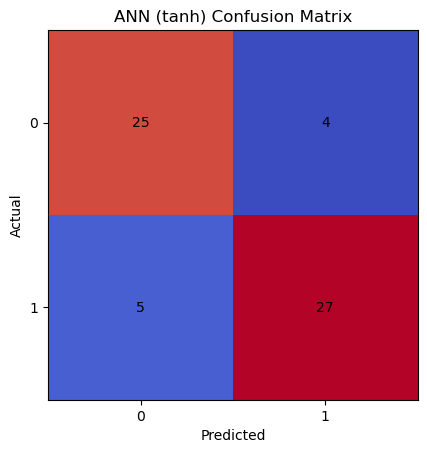

In [71]:
ann = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='tanh',            
    solver='adam',                
    max_iter=2000,                
    early_stopping=True,          
    random_state=42,
    learning_rate_init=0.001
)

ann.fit(X_pca, y_train)
y_pred_ann = ann.predict(X_test_pca)
print("Artificial Neural Network (ANN) Results for tanh function")
print("Accuracy :", accuracy_score(y_test, y_pred_ann))
print("Precision:", precision_score(y_test, y_pred_ann, average='weighted', zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_ann, average='weighted', zero_division=0))
print("F1 Score :", f1_score(y_test, y_pred_ann, average='weighted', zero_division=0))
plot_confusion_matrix(y_test, y_pred_ann, "ANN (tanh) Confusion Matrix")